<a href="https://colab.research.google.com/github/riddhi-jain/Way-to-Deep-Learning/blob/main/Basic_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

This notebook trains a neural network model to classify images of clothing, like sneakers and shirts.

 I am using tf.keras, a high-level API to build and train models in TensorFlow.



In [2]:
# basic imports
import tensorflow as tf
from tensorflow import keras

# additional imports
import matplotlib.pyplot as plt
import numpy as np

# Dataset
The dataset used is the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images.

The Fashion MNIST data can be imported and loaded directly from TensorFlow.

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.
The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9, These correspond to the class of clothing the image represents.

# Data Exploration

In [5]:
# array shape verification
train_images.shape

(60000, 28, 28)

In [6]:
# accessing a single pixel at a location
train_images[0, 23, 23]

194

Our pixel values are between 0-255 , 0 being black and 255 being white. Here 194 is the greyscale value of this pixel. 

In [ ]:
# numpy array for any data item in particular viz. index referencing
train_images[0]

In [10]:
train_labels.shape

(60000,)

In [11]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

This means the dataset is divided into 10 (0-9) clases.

Each image is mapped to a single label. Creating an array of label names to indicate the category of clothing associated with each class number.

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

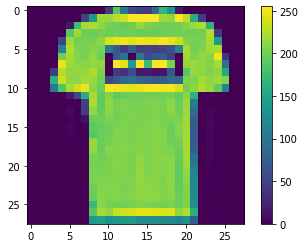

In [15]:
# exploring how the images actually look like in dataset

plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

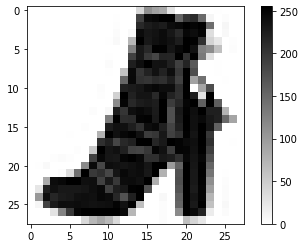

In [27]:
plt.figure()
plt.imshow(train_images[11], cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

# Data Preprocessing

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [28]:
train_images = train_images / 255.0
test_images = test_images / 255.0

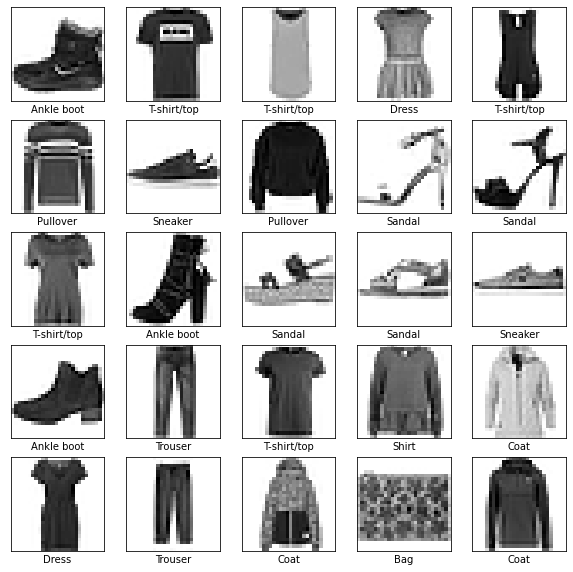

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Model Building

Building the neural network requires configuring the layers of the model, then compiling the model.

In [32]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28, 28)),   # input layer-1 
                             tf.keras.layers.Dense(128, activation='relu'),     # hidden layer-2
                             tf.keras.layers.Dense(10, activation= 'softmax')                          # output layer-3
])

# Model Compilation
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

* Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* Optimizer —This is how the model is updated based on the data it sees and its loss function.
* Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [34]:
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

# Model Training

In [71]:
model.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1041 - accuracy: 0.9609


# Model Evaluation

In [72]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1);

313/313 [==============================] - 0s 1ms/step - loss: 0.4971 - accuracy: 0.8835


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting.

# Making Predictions

In [74]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [75]:
predictions = probability_model.predict(test_images)

In [76]:
# predictions for 0th indexed test_image for each class
predictions[0]

array([0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
       0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.23196931],
      dtype=float32)

In [77]:
# the class associated with the index with maximum value would be the considerable prediction for test_image
np.argmax(predictions[0])

9

In [78]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

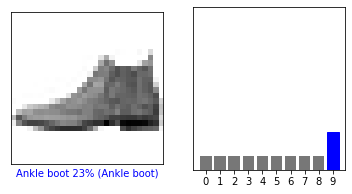

In [79]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

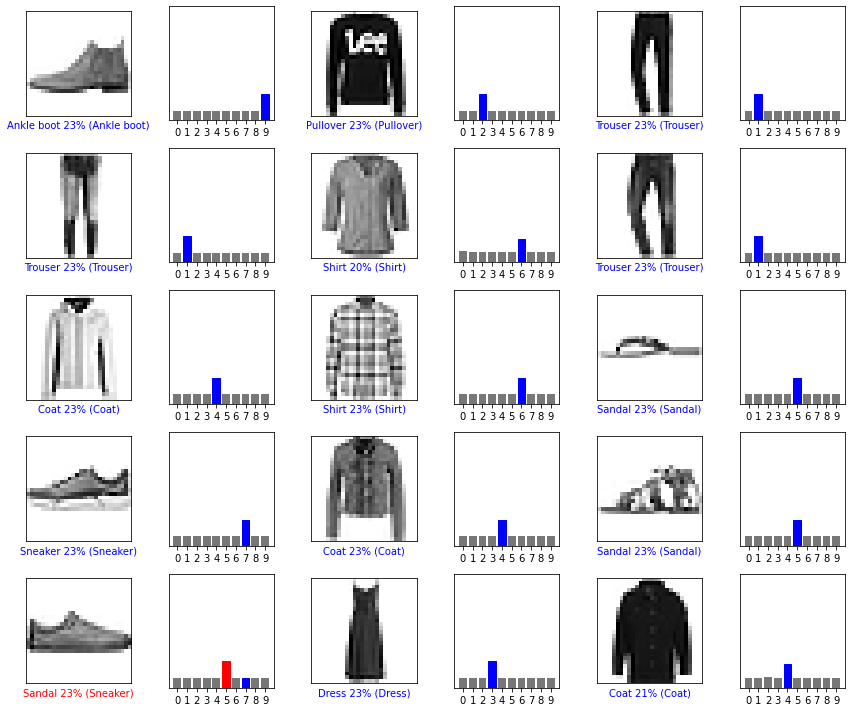

In [69]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()